<a href="https://colab.research.google.com/github/davidfague/Neural-Modeling/blob/main/NMDA_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
is_colab = 'google.colab' in str(get_ipython())

In [2]:
if is_colab:
    !git clone https://github.com/davidfague/Neural-Modeling.git
    %cd /content/Neural-Modeling

import numpy as np
import matplotlib.pyplot as plt
from Modules.segment import SegmentManager
from Modules.plotting_utils import plot_sta

Cloning into 'Neural-Modeling'...
remote: Enumerating objects: 1389, done.
remote: Counting objects: 100% (300/300), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 1389 (delta 187), reused 230 (delta 146), pack-reused 1089
Receiving objects: 100% (1389/1389), 16.08 MiB | 12.84 MiB/s, done.
Resolving deltas: 100% (897/897), done.
/content/Neural-Modeling


In [3]:
if is_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd /content/drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


In [4]:
%ls

 1000.0outputcontrol_108nbranch_28918NCs_28918nsyn_642nseg/
 1000.0outputcontrol_108nbranch_29140NCs_29140nsyn_196nseg/
 1000.0outputcontrol_108nbranch_29290NCs_29290nsyn_642nseg/
 2000.0outputcontrol_108nbranch_29068NCs_29068nsyn_196nseg/
 400.0outputcontrol_108nbranch_29140NCs_29140nsyn_196nseg/
 500.0outputcontrol_108nbranch_29068NCs_29068nsyn_196nseg/
 500.0outputcontrol_108nbranch_29068NCs_29068nsyn_642nseg/
 500.0outputcontrol_108nbranch_29140NCs_29140nsyn_196nseg/
 500.0outputcontrol_108nbranch_29140NCs_29140nsyn_642nseg/
 500.0outputcontrol_108nbranch_29290NCs_29290nsyn_642nseg/
 appsheet/
'BE 4540 Project 3'/
'BE 4540 Project 4'/
'Colab Notebooks'/
 colab_pdf.py
 content/
 Currents_Axon.png
 Currents_Basal.png
 Currents_Nexus.png
 Currents_Soma.png
 Currents_Trunk.png
 Currents_Tuft.png
'ECP heatmap.png'
'ECP timecourse.png'
 Elec_distance.png
 Elec_distance.svg
 exc_syns.svg
 expanded_segments_df.csv
'How to get started with Drive.pdf'
'L5PCtemplate[0]_0e-1Hz_642nseg_1000ms_1

In [5]:
random_state = np.random.RandomState(123)

In [6]:
output_folder = "L5PCtemplate[0]_60e-1Hz_642nseg_1500ms_108nbranch_28918NCs_28918nsyn"
dt = 0.1

sm = SegmentManager(output_folder, dt = dt, skip=50)

In [7]:
threshold = 0.003 / 1000
ms_within_somatic_spike = 2

sm.get_na_lower_bounds_for_seg(sm.segments[0], threshold, ms_within_somatic_spike)

array([12239, 13124, 14085, 14122])

In [8]:
# skip vs na_lower_bounds
# skip = 150 : array([13085, 13122])
# skip = 100 : array([12624, 13585, 13622])
# skip = 50  : array([12239, 13124, 14085, 14122])

In [9]:
sm.soma_spiketimes

array([  97.2,  193.2,  271.6,  447.1,  574.5,  837.3, 1171.7, 1220.9])

In [10]:
na_lower_bounds, peak_values, flattened_peak_values = sm.get_na_lower_bounds_and_peaks(threshold, ms_within_somatic_spike)

/content/Neural-Modeling/Modules/segment.py:175: UserWarning: Skipped 1 indicies, since they exceeded the data length.
  warnings.warn(warining_text)


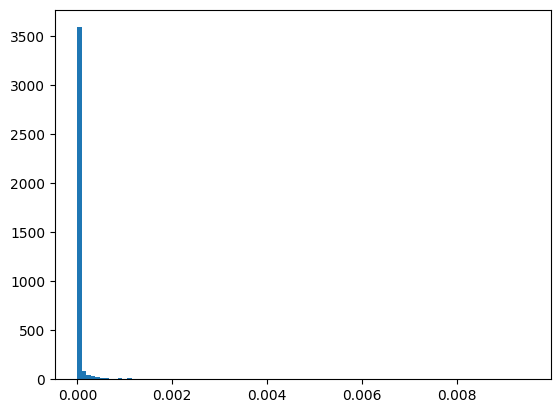

In [11]:
plt.hist(np.array(flattened_peak_values), bins = 100);

In [12]:
edges_dend = sm.get_edges(na_lower_bounds, "dend")
edges_apic = sm.get_edges(na_lower_bounds, "apic")

In [13]:
na_dend = sm.get_sta(sm.soma_spiketimes, na_lower_bounds, edges_dend, "dend")
na_apic = sm.get_sta(sm.soma_spiketimes, na_lower_bounds, edges_apic, "apic")

In [14]:
rand_spktimes = np.sort(np.random.choice(np.arange(0, 150000), sm.soma_spiketimes.shape[0]))
na_dend_rand = sm.get_sta(rand_spktimes, na_lower_bounds, edges_dend, "dend")
na_apic_rand = sm.get_sta(rand_spktimes, na_lower_bounds, edges_apic, "apic")

In [15]:
len(sm.soma_spiketimes)
# np.percentile(to_plot, (1,99))

8

In [16]:
na_lower_bounds

[array([12239, 13124, 14085, 14122]),
 array([12428, 13528, 13827, 14327]),
 array([12436, 13524]),
 array([12455]),
 array([12411, 12455, 12909]),
 array([12381, 12455, 12850, 12905]),
 array([12378, 12455, 12905]),
 array([12376, 12458, 12880, 12906, 13627]),
 array([12377, 12459, 12876, 12905, 13628]),
 array([12378, 12460, 12877, 12906, 13629]),
 array([12454, 12479, 13161, 13519, 14340]),
 array([12495, 13162, 13515, 14331]),
 array([12494, 12608, 13514, 13584, 13725, 14136, 14329, 14376]),
 array([12359, 12492, 12607, 13263, 13515, 13583, 13726, 14329, 14373]),
 array([12238, 12493, 12608, 13256, 13516, 13583, 13726, 13856, 14329,
        14372]),
 array([12238, 12495, 12609, 13257, 13518, 13584, 13727, 13847, 14330,
        14372]),
 array([13157, 13514, 13825, 14326]),
 array([12427, 12445, 13148, 13502, 13815, 14167, 14315]),
 array([12447, 12840, 13142, 13497, 13810, 14161, 14316]),
 array([12317, 12388, 12444, 12836, 13142, 13495, 13783, 14059, 14109,
        14158, 14218, 1

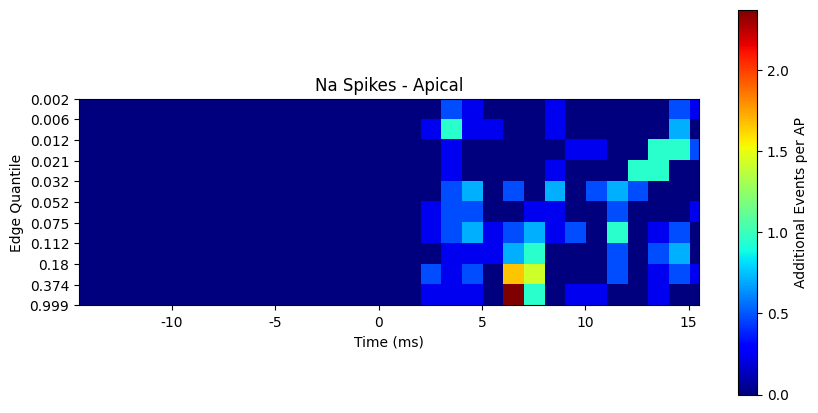

In [17]:
to_plot = (na_apic - na_apic_rand) / len(sm.soma_spiketimes)
title = 'Na Spikes - Apical'
x_ticks = np.arange(0, 40, 5)
x_tick_labels = ['{}'.format(i) for i in np.arange(-20, 20, 5)]
xlim = (5, 35)
plot_sta(to_plot, edges_apic, title, x_ticks, x_tick_labels, xlim)

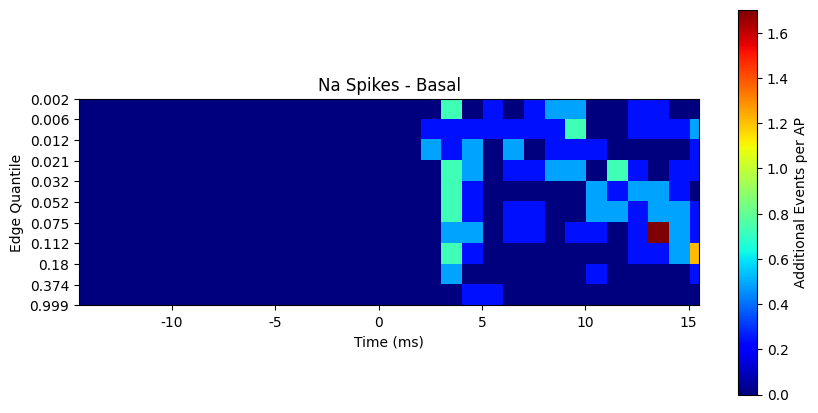

In [18]:
to_plot = (na_dend - na_dend_rand) / len(sm.soma_spiketimes)
title = 'Na Spikes - Basal'
x_ticks = np.arange(0, 40, 5)
x_tick_labels = ['{}'.format(i) for i in np.arange(-20, 20, 5)]
xlim = (5, 35)
plot_sta(to_plot, edges_apic, title, x_ticks, x_tick_labels, xlim)

In [19]:
lowery, uppery = 500, 1500

In [20]:
ca_lower_bounds, _, _, _, _, _ = sm.get_ca_nmda_lower_bounds_durations_and_peaks(lowery = lowery,
                                                                                 uppery = uppery,
                                                                                 random_state = random_state)

In [21]:
edges_ca = sm.get_edges(ca_lower_bounds)
ca_apic = sm.get_sta(sm.soma_spiketimes, ca_lower_bounds, edges_ca, "apic")
rand_spktimes = np.sort(np.random.choice(np.arange(0, 150000), sm.soma_spiketimes.shape[0]))
ca_apic_rand = sm.get_sta(rand_spktimes, ca_lower_bounds, edges_ca, "apic")

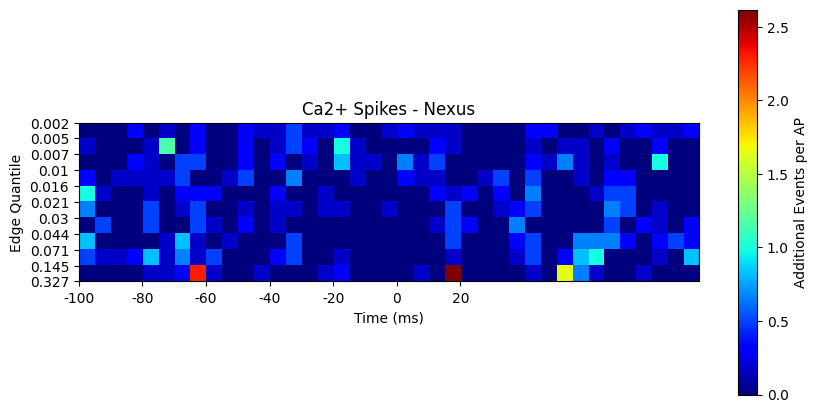

In [22]:
to_plot = (ca_apic - ca_apic_rand) / len(sm.soma_spiketimes)
title = 'Ca2+ Spikes - Nexus'
x_ticks = np.arange(0, 26, 4)
x_tick_labels = ['{}'.format(i) for i in np.arange(-100, 40, 20)]
plot_sta(to_plot, edges_ca, title, x_ticks, x_tick_labels, [])

In [23]:
nmda_lower_bounds, _, _, _, _, _ = sm.get_ca_nmda_lower_bounds_durations_and_peaks(lowery = None,
                                                                                   uppery = None,
                                                                                   random_state = random_state)

In [24]:
edges_nmda_apic = sm.get_edges(nmda_lower_bounds, "apic")
nmda_apic = sm.get_sta(sm.soma_spiketimes, nmda_lower_bounds, edges_nmda_apic, "apic")
rand_spktimes_apic = np.sort(np.random.choice(np.arange(0, 150000), sm.soma_spiketimes.shape[0]))
nmda_rand_apic = sm.get_sta(rand_spktimes_apic, nmda_lower_bounds, edges_nmda_apic, "apic")

In [25]:
edges_nmda_dend = sm.get_edges(nmda_lower_bounds, "dend")
nmda_dend = sm.get_sta(sm.soma_spiketimes, nmda_lower_bounds, edges_nmda_dend, "dend")
rand_spktimes_dend = np.sort(np.random.choice(np.arange(0, 150000), sm.soma_spiketimes.shape[0]))
nmda_rand_dend = sm.get_sta(rand_spktimes_dend, nmda_lower_bounds, edges_nmda_dend, "dend")

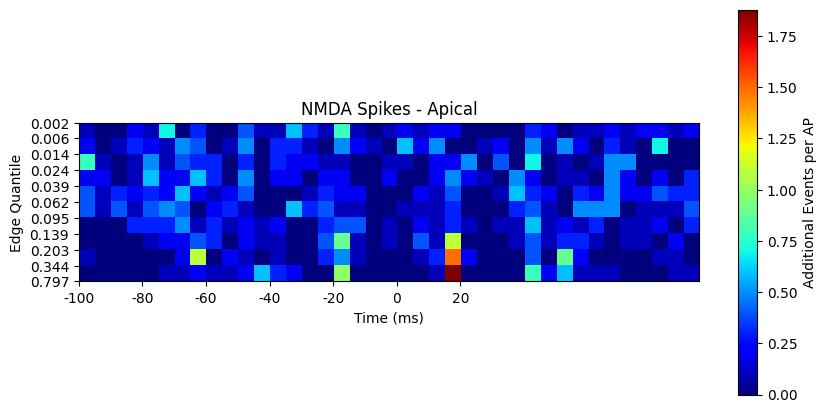

In [26]:
to_plot = (nmda_apic - nmda_rand_apic) / len(sm.soma_spiketimes)
title = 'NMDA Spikes - Apical'
x_ticks = np.arange(0, 26, 4)
x_tick_labels = ['{}'.format(i) for i in np.arange(-100, 40, 20)]
plot_sta(to_plot, edges_nmda_apic, title, x_ticks, x_tick_labels, [])

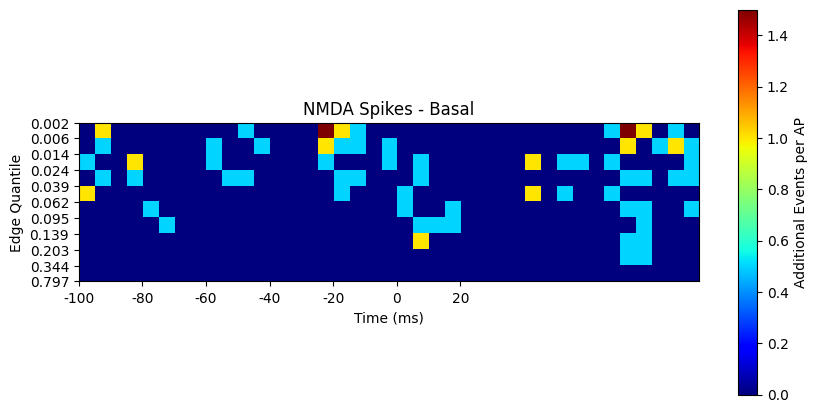

In [27]:
to_plot = (nmda_dend-nmda_rand_dend) / len(sm.soma_spiketimes)
title = 'NMDA Spikes - Basal'
x_ticks = np.arange(0, 26, 4)
x_tick_labels = ['{}'.format(i) for i in np.arange(-100, 40, 20)]
plot_sta(to_plot, edges_nmda_apic, title, x_ticks, x_tick_labels, [])

In [28]:
ca_spiketimes = []
for ind, i in enumerate(ca_lower_bounds):
    if (len(i) > 0) & ('apic[50]' in sm.segments[ind].sec):
        ca_spiketimes.extend(i.tolist())

ca_spiketimes = np.sort(ca_spiketimes) * dt
ca_spiketimes = ca_spiketimes[1:][np.diff(ca_spiketimes) > 100] # This condition is from Ben's code. It's supposed to remove duplicates.

In [29]:
ca_nmda_apic = sm.get_sta(ca_spiketimes, nmda_lower_bounds, edges_nmda_apic, "apic")
ca_rand_spktimes_apic = np.sort(np.random.choice(np.arange(0, 150000), ca_spiketimes.shape[0]))
ca_nmda_rand_apic = sm.get_sta(ca_rand_spktimes_apic, nmda_lower_bounds, edges_nmda_apic, "apic")

ca_nmda_dend = sm.get_sta(ca_spiketimes, nmda_lower_bounds, edges_nmda_dend, "dend")
ca_rand_spktimes_dend = np.sort(np.random.choice(np.arange(0, 150000), ca_spiketimes.shape[0]))
ca_nmda_rand_dend = sm.get_sta(ca_rand_spktimes_dend, nmda_lower_bounds, edges_nmda_dend, "dend")

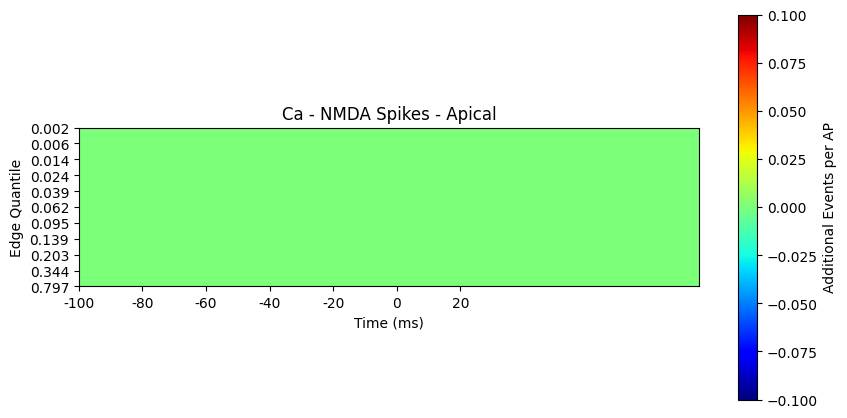

In [30]:
to_plot = (ca_nmda_apic - ca_nmda_rand_apic) / len(ca_spiketimes)
title = 'Ca - NMDA Spikes - Apical'
x_ticks = np.arange(0, 26, 4)
x_tick_labels = ['{}'.format(i) for i in np.arange(-100, 40, 20)]
plot_sta(to_plot, edges_nmda_apic, title, x_ticks, x_tick_labels, [])

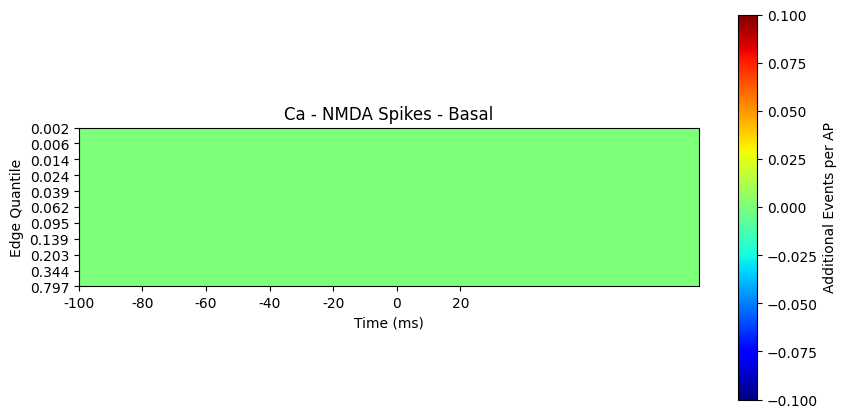

In [31]:
to_plot = (ca_nmda_dend - ca_nmda_rand_dend) / len(ca_spiketimes)
title = 'Ca - NMDA Spikes - Basal'
x_ticks = np.arange(0, 26, 4)
x_tick_labels = ['{}'.format(i) for i in np.arange(-100, 40, 20)]
plot_sta(to_plot, edges_nmda_apic, title, x_ticks, x_tick_labels, [])